   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  

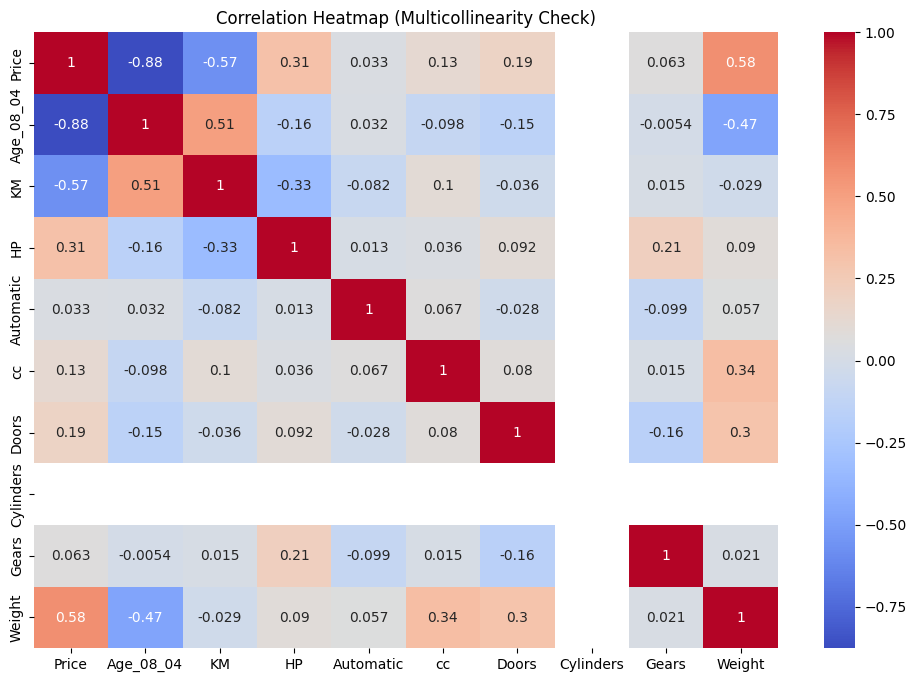

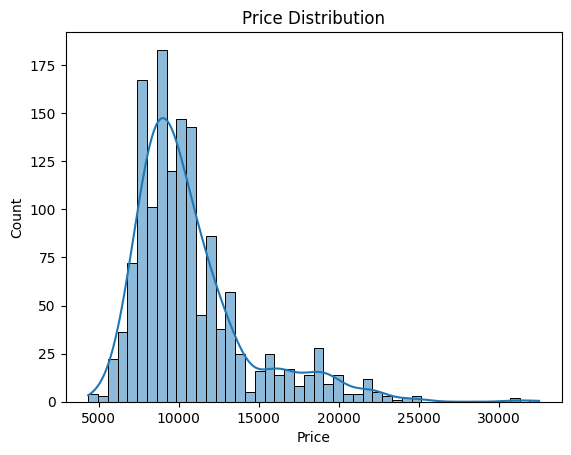


Multiple Linear Regression Performance:
MSE: 2203043.823143704
R²: 0.8348888040611081
Adjusted R²: 0.8283082853823842
AIC: 4228.34094920453
BIC: 4268.633514486026

Reduced Feature Model Performance:
MSE: 1993321.0129727365
R²: 0.8506068681500834

Robust Regression (Huber) Performance:
MSE: 2704504.0041275537
R²: 0.7973059428723428

Lasso R²: 0.8349116135580272
Ridge R²: 0.8350462635431564

MLR Model Coefficients:
                   Coefficient
Weight            1.316818e+03
Fuel_Type_Petrol  4.580477e+02
HP                2.083499e+02
Gears             1.093404e+02
Automatic         3.439713e+01
Cylinders         1.421085e-13
cc               -1.416192e+01
Fuel_Type_Diesel -2.172217e+01
Doors            -5.746780e+01
KM               -6.116544e+02
Age_08_04        -2.267295e+03


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("ToyotaCorolla - MLR.csv")

print(df.head())
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Data Cleaning
df.dropna(inplace=True)

# EDA & Multicollinearity (Correlation Matrix)
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Multicollinearity Check)")
plt.show()

sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

# Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.drop("Price", axis=1)
y = df["Price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multiple Linear Regression (MLR)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# AIC & BIC (Manual Calculation)
rss = np.sum((y_test - y_pred) ** 2)
aic = n * np.log(rss / n) + 2 * p
bic = n * np.log(rss / n) + p * np.log(n)

print("\nMultiple Linear Regression Performance:")
print("MSE:", mse)
print("R²:", r2)
print("Adjusted R²:", adj_r2)
print("AIC:", aic)
print("BIC:", bic)

# Reduced Feature Model
selected_features = ["Age_08_04", "KM", "HP", "Weight"]
X2 = df[selected_features]
y2 = df["Price"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

lr2 = LinearRegression()
lr2.fit(X2_train_scaled, y2_train)
y2_pred = lr2.predict(X2_test_scaled)

print("\nReduced Feature Model Performance:")
print("MSE:", mean_squared_error(y2_test, y2_pred))
print("R²:", r2_score(y2_test, y2_pred))

# Robust Regression (Outlier Handling)
huber = HuberRegressor()
huber.fit(X_train_scaled, y_train)

y_huber = huber.predict(X_test_scaled)

print("\nRobust Regression (Huber) Performance:")
print("MSE:", mean_squared_error(y_test, y_huber))
print("R²:", r2_score(y_test, y_huber))

# Regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

print("\nLasso R²:", r2_score(y_test, lasso.predict(X_test_scaled)))
print("Ridge R²:", r2_score(y_test, ridge.predict(X_test_scaled)))

# Model Coefficients
coefficients = pd.DataFrame(
    lr.coef_, index=X.columns, columns=["Coefficient"]
)

print("\nMLR Model Coefficients:")
print(coefficients.sort_values(by="Coefficient", ascending=False))


In [ ]:
## Interview Answers:
1. Normalization rescales data to a fixed range, usually [0, 1].
  Standardization rescales data to have mean = 0 and standard deviation = 1
*Prevents features with large scales from dominating the model
*Improves model convergence
*Required for distance-based & regularized model
*Makes coefficients comparable

2. Multicollinearity in multiple linear regression can be addressed using correlation analysis, VIF, feature selection, reglarization techniques like Ridge and Lasso, PCA, and robust regression methods.

3. 